In [30]:
#! pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 876.8 kB/s eta 0:00:0000:01:020m


In [2]:
# Initiating all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import AntPath

In [3]:
# Reading the uk railway dataset csv file
ukrailway = pd.read_csv('railway.csv')

In [4]:
# Displaying the top 5 rows of the dataset
ukrailway.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [5]:
# Descriptive analysis of numerical columns
ukrailway.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [6]:
# Check for missing values
ukrailway.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

If a person does not have a Railcard, their Railcard field will be null. This is expected and does not indicate an issue with the data.
If a train is not delayed, the actual arrival time is the same as the scheduled arrival time. In these cases, the actual arrival time field may not be filled, and there will be no reason for delay provided. These null values are also expected and not indicative of any data issues.

In [7]:
# Check for duplicate rows
ukrailway.duplicated().sum()

0

There are no duplicates in the dataset

In [8]:
# Checking data types of the columns
ukrailway.dtypes

Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object

Only Price is int, rest all is object

In [9]:
#creating new datetime column for purhase date of tickets with date and time together
ukrailway['datetime_of_purchase'] = pd.to_datetime(ukrailway['Date of Purchase'] + ' ' + ukrailway['Time of Purchase'])

In [10]:
# Convert time columns to datetime with respect to date_of_journey
ukrailway['departure_datetime'] = pd.to_datetime(ukrailway['Date of Journey'] + ' ' + ukrailway['Departure Time'])
ukrailway['arrival_datetime'] = pd.to_datetime(ukrailway['Date of Journey'] + ' ' + ukrailway['Arrival Time'])


In [11]:
# Convert actual arrival time considering the date
ukrailway['actual_arrival_datetime'] = pd.to_datetime(ukrailway['Date of Journey'] + ' ' + ukrailway['Actual Arrival Time'], errors='coerce')

In [12]:
# Convert date columns to datetime format
ukrailway['datetime_of_purchase'] = pd.to_datetime(ukrailway['datetime_of_purchase'])
ukrailway['departure_datetime'] = pd.to_datetime(ukrailway['departure_datetime'])
ukrailway['arrival_datetime'] = pd.to_datetime(ukrailway['arrival_datetime'])
ukrailway['actual_arrival_datetime'] = pd.to_datetime(ukrailway['actual_arrival_datetime'])

In [13]:
ukrailway.dtypes

Transaction ID                     object
Date of Purchase                   object
Time of Purchase                   object
Purchase Type                      object
Payment Method                     object
Railcard                           object
Ticket Class                       object
Ticket Type                        object
Price                               int64
Departure Station                  object
Arrival Destination                object
Date of Journey                    object
Departure Time                     object
Arrival Time                       object
Actual Arrival Time                object
Journey Status                     object
Reason for Delay                   object
Refund Request                     object
datetime_of_purchase       datetime64[ns]
departure_datetime         datetime64[ns]
arrival_datetime           datetime64[ns]
actual_arrival_datetime    datetime64[ns]
dtype: object

In [14]:
# List of columns to drop as we created new columns for these date time columns
columns_to_drop = ['Date of Purchase', 'Time of Purchase', 'Date of Journey',
                   'Departure Time', 'Arrival Time', 'Actual Arrival Time']

# Drop the specified columns
ukrailway.drop(columns=columns_to_drop, inplace=True)

# Display the resulting DataFrame
ukrailway

,Transaction ID,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Status,Reason for Delay,Refund Request,datetime_of_purchase,departure_datetime,arrival_datetime,actual_arrival_datetime
0,da8a6ba8-b3dc-4677-b176,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,On Time,NaN,No,2023-12-08 12:41:11,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00
1,b0cdd1b0-f214-4197-be53,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,Delayed,Signal Failure,No,2023-12-16 11:23:01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00
2,f3ba7a96-f713-40d9-9629,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,On Time,NaN,No,2023-12-19 19:51:27,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00
3,b2471f11-4fe7-4c87-8ab4,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,On Time,NaN,No,2023-12-20 23:00:36,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00
4,2be00b45-0762-485e-a7a3,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,On Time,NaN,No,2023-12-27 18:22:56,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,On Time,NaN,No,2024-04-30 18:42:58,2024-04-30 20:00:00,2024-04-30 20:30:00,2024-04-30 20:30:00
31649,7da22246-f480-417c-bc2f,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,On Time,NaN,No,2024-04-30 18:46:10,2024-04-30 20:15:00,2024-04-30 21:35:00,2024-04-30 21:35:00
31650,add9debf-46c1-4c75-b52d,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,On Time,NaN,No,2024-04-30 18:56:41,2024-04-30 20:15:00,2024-04-30 20:45:00,2024-04-30 20:45:00
31651,b92b047c-21fd-4859-966a,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,On Time,NaN,No,2024-04-30 19:51:47,2024-04-30 21:15:00,2024-04-30 22:35:00,2024-04-30 22:35:00


In [15]:
# Calculate delay duration in minutes
ukrailway['delay_duration'] = (ukrailway['actual_arrival_datetime'] - ukrailway['arrival_datetime']).dt.total_seconds() / 60.0

In [16]:
#Display top 5 rows
ukrailway.head()

,Transaction ID,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Status,Reason for Delay,Refund Request,datetime_of_purchase,departure_datetime,arrival_datetime,actual_arrival_datetime,delay_duration
0,da8a6ba8-b3dc-4677-b176,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,On Time,NaN,No,2023-12-08 12:41:11,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,0.0
1,b0cdd1b0-f214-4197-be53,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,Delayed,Signal Failure,No,2023-12-16 11:23:01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,5.0
2,f3ba7a96-f713-40d9-9629,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,On Time,NaN,No,2023-12-19 19:51:27,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,0.0
3,b2471f11-4fe7-4c87-8ab4,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,On Time,NaN,No,2023-12-20 23:00:36,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,0.0
4,2be00b45-0762-485e-a7a3,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,On Time,NaN,No,2023-12-27 18:22:56,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,0.0


we combined date and time information into complete datetime fields for purchase, departure, arrival, and actual arrival times. Then we calculated the delay duration for each train journey in minutes. This helps in precisely analyzing train delays and their patterns.

### Displaying the UK railway stations and the direction of service routes between these stations on map

In [17]:
# Getting the exact coordinates for the station and UK central location from Chatgpt
# Storing these data into csv file and reading it as a dataframe
coordinates = pd.read_csv('coordinates.csv')
coordinates.head()

,Station,Latitude,Longitude
0,London Paddington,51.5154,-0.1754
1,London Kings Cross,51.5308,-0.1238
2,Liverpool Lime Street,53.4070,-2.9770
3,London Euston,51.5283,-0.1331
4,York,53.9583,-1.0803


In [18]:
# Creating a new data frame by joining ukrailway and coordinates on station names
# Joining source station and station name to get source coordinates
merged_df = pd.merge(ukrailway, coordinates, left_on='Departure Station', right_on='Station')
merged_df = merged_df[['Departure Station', 'Arrival Destination', 'Latitude', 'Longitude']]

#Renaming source coordinates columns
merged_df.columns = ['Departure Station', 'Arrival Destination', 'Src_Latitude', 'Src_Longitude']
merged_df.head()

,Departure Station,Arrival Destination,Src_Latitude,Src_Longitude
0,London Paddington,Liverpool Lime Street,51.5154,-0.1754
1,London Paddington,Reading,51.5154,-0.1754
2,London Paddington,Reading,51.5154,-0.1754
3,London Paddington,Reading,51.5154,-0.1754
4,London Paddington,Reading,51.5154,-0.1754


In [19]:
# Joining arrival destination and station name to get destination coordinates
merged_df = pd.merge(merged_df, coordinates, left_on='Arrival Destination', right_on='Station')
merged_df = merged_df[['Departure Station', 'Arrival Destination', 'Src_Latitude', 'Src_Longitude', 'Latitude', 'Longitude']]

#Renaming destination coordinates columns
merged_df.columns = ['Departure Station', 'Arrival Destination', 'Src_Latitude', 'Src_Longitude', 'Des_Latitude', 'Des_Longitude']
merged_df.head()

,Departure Station,Arrival Destination,Src_Latitude,Src_Longitude,Des_Latitude,Des_Longitude
0,London Paddington,Liverpool Lime Street,51.5154,-0.1754,53.407,-2.977
1,London Paddington,Liverpool Lime Street,51.5154,-0.1754,53.407,-2.977
2,London Paddington,Liverpool Lime Street,51.5154,-0.1754,53.407,-2.977
3,London Paddington,Liverpool Lime Street,51.5154,-0.1754,53.407,-2.977
4,London Paddington,Liverpool Lime Street,51.5154,-0.1754,53.407,-2.977


There are lots of duplicate values so we need to clean the data by dropping them.

In [20]:
# Dropping duplicate rows to avoid load on map generation
merged_df.drop_duplicates(inplace=True)

# Resetting the index of merged_df dataset
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Departure Station,Arrival Destination,Src_Latitude,Src_Longitude,Des_Latitude,Des_Longitude
0,London Paddington,Liverpool Lime Street,51.5154,-0.1754,53.407,-2.977
1,London Kings Cross,Liverpool Lime Street,51.5308,-0.1238,53.407,-2.977
2,York,Liverpool Lime Street,53.9583,-1.0803,53.407,-2.977
3,Manchester Piccadilly,Liverpool Lime Street,53.4774,-2.2302,53.407,-2.977
4,Birmingham New Street,Liverpool Lime Street,52.4778,-1.8980,53.407,-2.977


In [21]:
# Checking the count of unique service routes
merged_df.shape

(65, 6)

In [22]:
# Generating map and directional path on the UK map
# Initializing UK center
UK_Center = (54.0000, -2.0000)

# Initializing the UK map
train_map = folium.Map(location=UK_Center, zoom_start=7)

# Using for loop to add markers and path on the map
for index, row in merged_df.iterrows():

    # Adding source station marker
    folium.Marker(
        [row['Src_Latitude'], row['Src_Longitude']],
        tooltip=row['Departure Station']).add_to(train_map)

    # Adding destination station marker
    folium.Marker(
        [row['Des_Latitude'], row['Des_Longitude']],
        tooltip=row['Arrival Destination']).add_to(train_map)

    # Adding between source station and destination station
    AntPath(
        [[row['Src_Latitude'], row['Src_Longitude']],
         [row['Des_Latitude'], row['Des_Longitude']]],
        delay=1000, weight=4, color="red", pulse_color="orange",
        dash_array=[30, 15]).add_to(train_map)
train_map

The map shows the exact locations of stations, and shows the routes taken by trains. We can further customize with additional features such as different colors for various routes, more detailed tooltips, or layers showing different types of services.

There are more number of staitions in the center south side of london. i.e near Liverpool and Birmingham

### Service Frequency vs average delay by service route

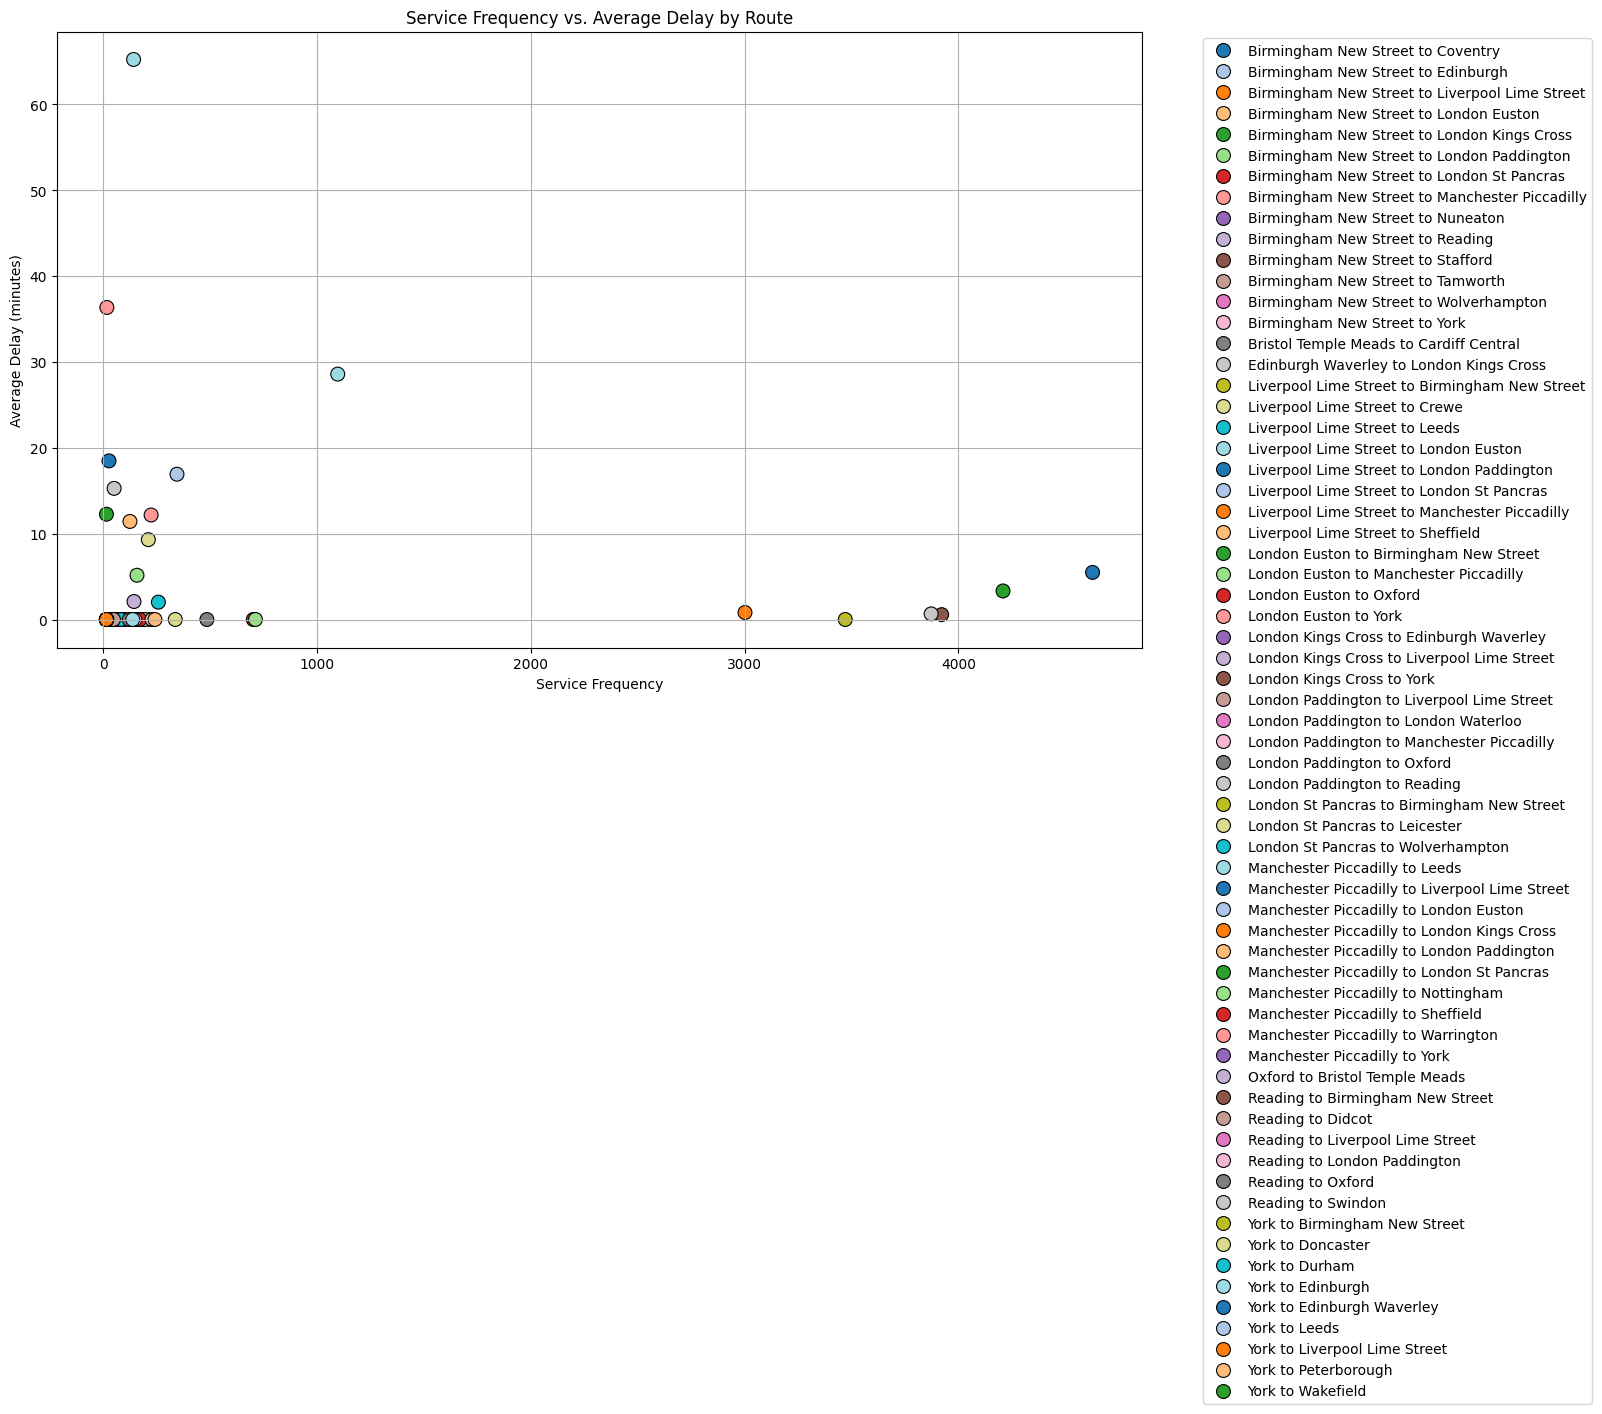

In [23]:
# Calculate service frequency
service_frequency = ukrailway.groupby(['Departure Station', 'Arrival Destination']).size().reset_index(name='service_frequency')

# Calculate average delay for each route
average_delay = ukrailway.groupby(['Departure Station', 'Arrival Destination'])['delay_duration'].mean().reset_index(name='average_delay')

# Merge both dataframes
result = pd.merge(service_frequency, average_delay, on=['Departure Station', 'Arrival Destination'])

# Create a Route column by concatenating Departure Station and Arrival Destination
result['Route'] = result['Departure Station'] + " to " + result['Arrival Destination']

# Plotting
plt.figure(figsize=(14, 8))

# Scatter plot for service frequency vs. average delay
sns.scatterplot(data=result, x='service_frequency', y='average_delay', hue='Route', palette='tab20', s=100, edgecolor='k')

plt.title('Service Frequency vs. Average Delay by Route')
plt.xlabel('Service Frequency')
plt.ylabel('Average Delay (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

The scatter plot shows how often trains run between stations and how delayed they tend to be. Routes with low service frequency and high delays indicate potential inefficiencies, while routes with high service frequency and low delays indicate efficient operations.

Most data points are clustered at the lower end of the service frequency scale (0 to 1000), indicating these routes have lower service frequencies.
A very few routes have higher service frequencies, up to around 5000.

Most routes with low service frequency have a wide range of average delays, from 0 to over 60 minutes.
Routes with higher service frequencies generally have lower average delays, often below 10 minutes.

Overall, this plot provides a clear visual representation of how often services run between stations and how delayed they tend to be, aiding in identifying operational efficiencies and inefficiencies.

The above analysis was very clustered and hard to interpret so we did another detailed analysis below:

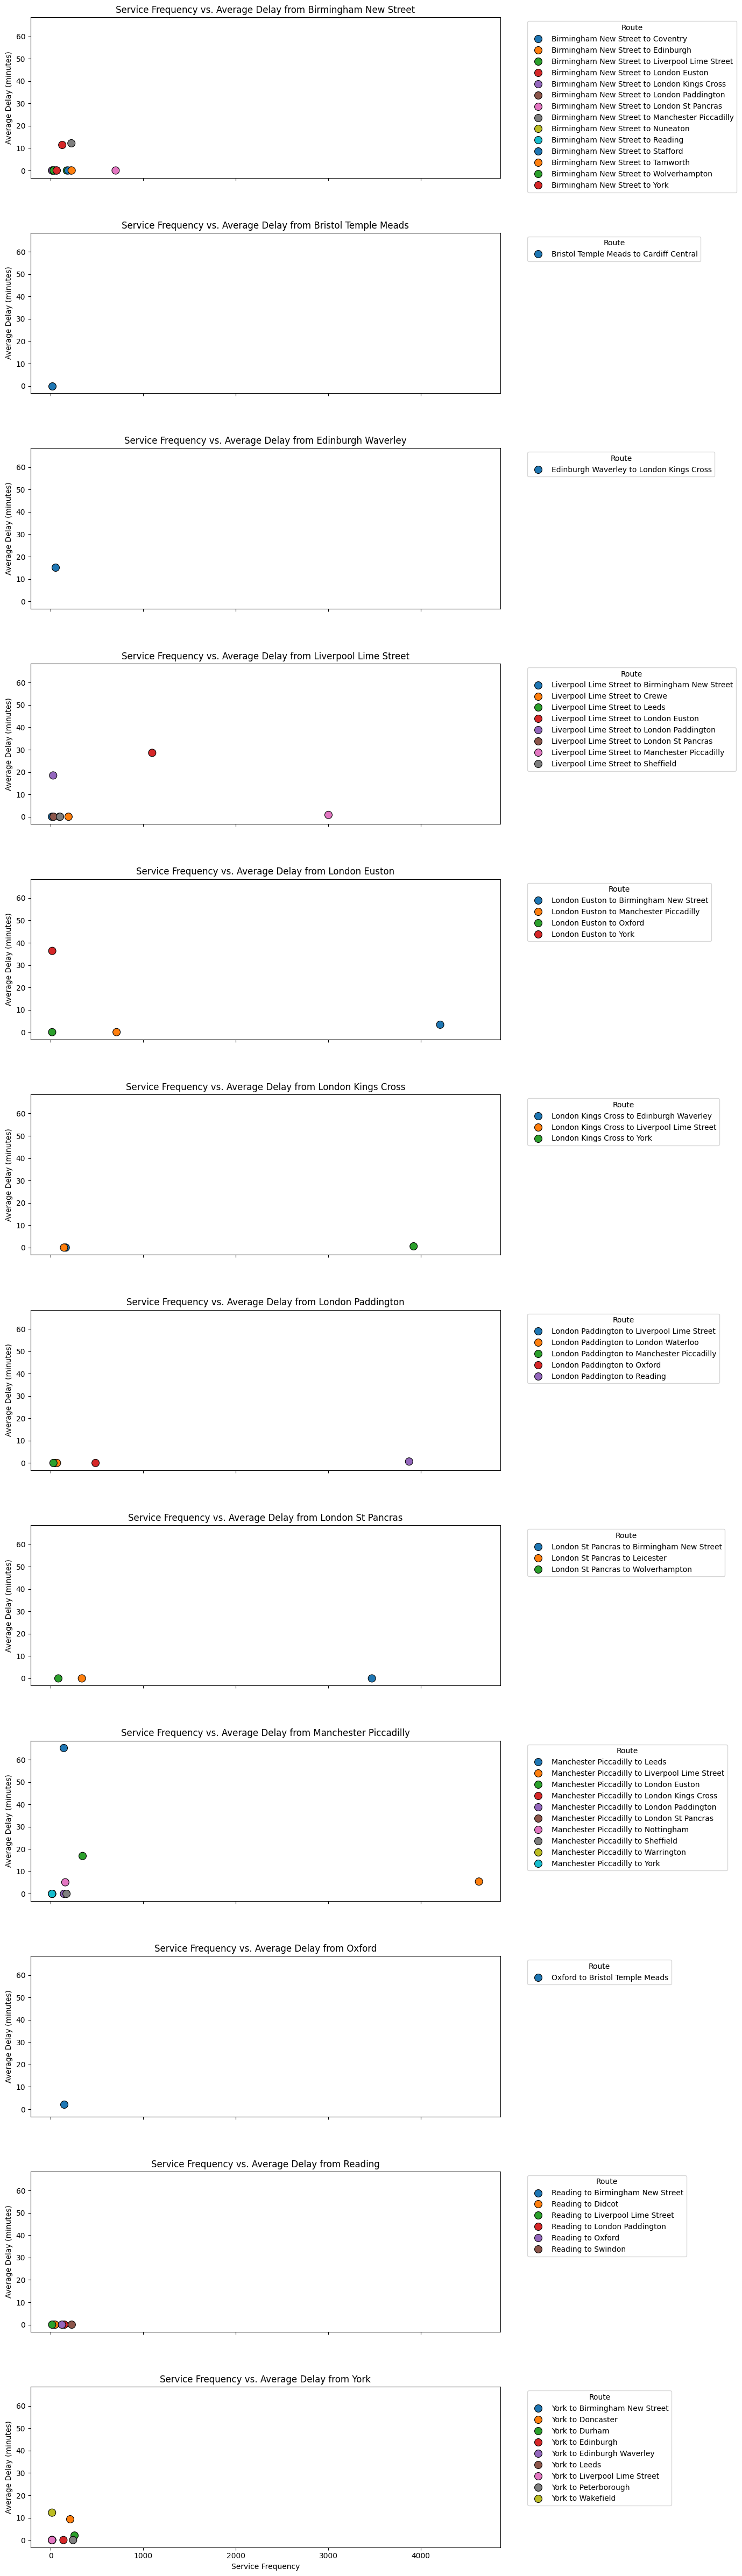

In [24]:
# Create a Route column by concatenating Departure Station and Arrival Destination
result['Route'] = result['Departure Station'] + " to " + result['Arrival Destination']

# Get unique departure places
unique_departure_places = result['Departure Station'].unique()
num_departure_places = len(unique_departure_places)

# Create subplots
fig, axes = plt.subplots(nrows=num_departure_places, ncols=1, figsize=(14, num_departure_places * 4), sharex=True, sharey=True)

for ax, departure_place in zip(axes, unique_departure_places):
    departure_data = result[result['Departure Station'] == departure_place]
    sns.scatterplot(data=departure_data, x='service_frequency', y='average_delay', hue='Route', palette='tab10', s=100, edgecolor='k', ax=ax)
    ax.set_title(f'Service Frequency vs. Average Delay from {departure_place}')
    ax.set_xlabel('Service Frequency')
    ax.set_ylabel('Average Delay (minutes)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Route')

plt.tight_layout()
plt.show()

After conducting a detailed analysis on service frequency versus average delay by service route, specifically focusing on departure and arrival stations, we found some interesting patterns. Routes involving Liverpool Lime Street, London Euston, London Paddington, London King's Cross, London St Pancras, and Manchester Piccadilly all have at least one outlier. These outliers indicate high frequency and very low train delays. In contrast, most other routes exhibit a more consistent trend, with lower frequency and varying delay times—some routes experience shorter delays, while others face longer delays.

In [25]:
import pandas as pd
import numpy as np

# Assuming your data is in a DataFrame called 'train_data'

# Group by route and calculate frequency and average delay
route_stats = ukrailway.groupby(['Departure Station', 'Arrival Destination']).agg({
    'Transaction ID': 'count',  # This gives us the frequency
    'delay_duration': 'mean'
}).reset_index()

# Rename columns for clarity
route_stats.columns = ['Departure Station', 'Arrival Destination', 'Frequency', 'Average Delay']

# Calculate the correlation coefficient
correlation = route_stats['Frequency'].corr(route_stats['Average Delay'])

print(f"The correlation coefficient between service frequency and average delay is: {correlation:.4f}")


The correlation coefficient between service frequency and average delay is: -0.0230


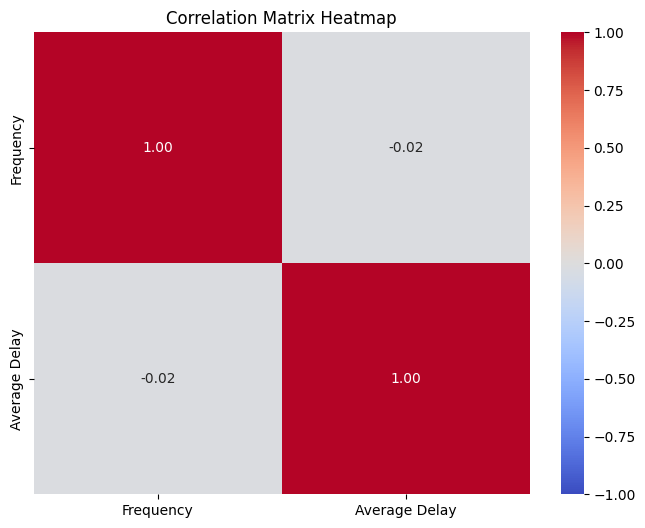

In [26]:
# Calculate the correlation matrix
correlation_matrix = route_stats[['Frequency', 'Average Delay']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

#### How significant are train delays based on the time of day or day of the week?

In [27]:
# Extracting relevant datetime columns for analysis
ukrailway['day_of_week'] = ukrailway['datetime_of_purchase'].dt.day_name()
ukrailway['hour_of_day'] = ukrailway['actual_arrival_datetime'].dt.hour

# Grouping by day of the week
avg_delay_by_day = ukrailway.groupby('day_of_week')['delay_duration'].mean().reset_index()

# Grouping by hour of the day
avg_delay_by_hour = ukrailway.groupby('hour_of_day')['delay_duration'].mean().reset_index()

# Sorting the hour of day for plotting purposes
avg_delay_by_hour.sort_values(by='hour_of_day', inplace=True)

print("Average Delay by Day of the Week:")
print(avg_delay_by_day)

print("\nAverage Delay by Hour of the Day:")
print(avg_delay_by_hour)

Average Delay by Day of the Week:
  day_of_week  delay_duration
0      Friday        3.314666
1      Monday        3.190431
2    Saturday        3.211066
3      Sunday        3.214139
4    Thursday        3.193947
5     Tuesday        3.131963
6   Wednesday        3.481013

Average Delay by Hour of the Day:
    hour_of_day  delay_duration
0           0.0        0.000000
1           1.0        0.000000
2           2.0        1.578417
3           3.0        0.000000
4           4.0        0.820463
5           5.0        1.828185
6           6.0        1.383613
7           7.0        0.478950
8           8.0        1.294927
9           9.0        0.293547
10         10.0       12.339241
11         11.0       18.206983
12         12.0       15.230580
13         13.0        4.844887
14         14.0        7.020833
15         15.0        0.155462
16         16.0        1.217814
17         17.0        1.002560
18         18.0        8.051178
19         19.0        2.676793
20         20.0    

/tmp/ipykernel_459/2748888130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='delay_duration', data=avg_delay_by_day, palette='viridis')


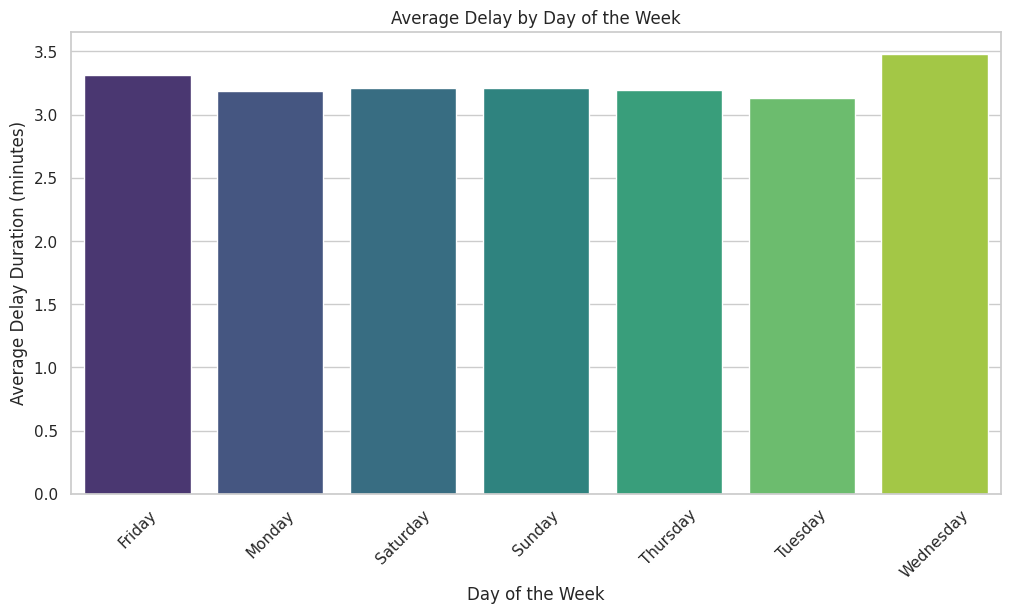

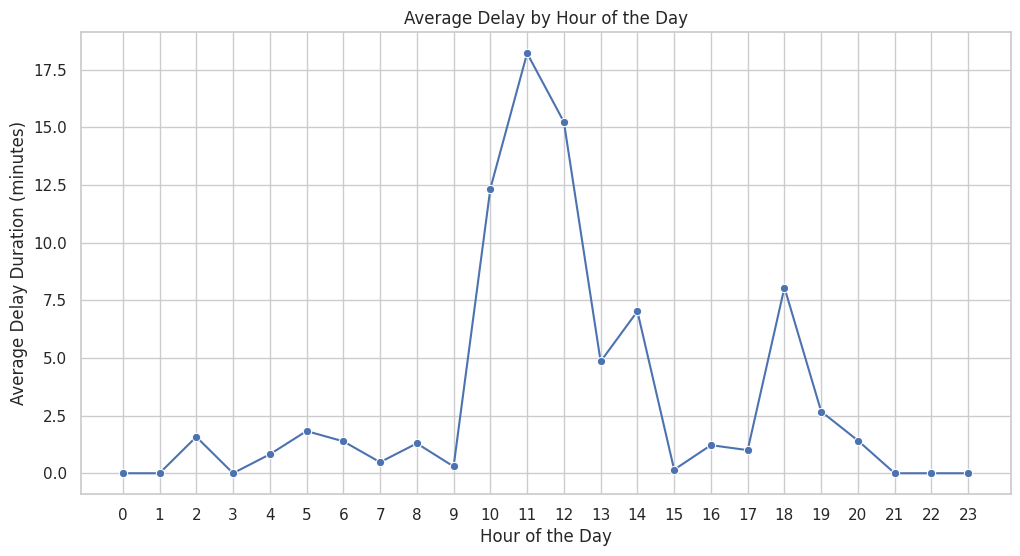

In [28]:
#Plotting the average delay by week and hour 

# Set the style for the plots
sns.set(style="whitegrid")

# Plot Average Delay by Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='delay_duration', data=avg_delay_by_day, palette='viridis')
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

# Plot Average Delay by Hour of the Day
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='delay_duration', data=avg_delay_by_hour, marker='o', color='b')
plt.title('Average Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay Duration (minutes)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


Wednesday has the highest average delay of 3.48 minutes.
Tuesday has the lowest average delay of 3.13 minutes.
Delays are relatively consistent across the week, with most days having an average delay between 3.1 and 3.3 minutes. However, the slightly higher delay on Wednesdays could indicate specific mid-week operational challenges or higher traffic on this day.

Late Morning and Early Afternoon (10:00 to 14:00) have significantly higher average delays, with peaks at 11:00 (18.21 minutes) and 12:00 (15.23 minutes), these suggest potential congestion or operational challenges during these hours.
Early Morning (0:00 to 9:00) and Late Evening (21:00 to 23:00) hours experience minimal to no delays, this could be due to fewer services running during these times, reducing the chance of congestion and delays.
The period from 10:00 to 14:00 shows a marked increase in delays compared to other times of the day.

In [31]:
ukrail = pd.read_csv('railway.csv')
#print(ukrail.head())
# Convert relevant columns to datetime
ukrail['Date of Journey'] = pd.to_datetime(ukrail['Date of Journey'])
ukrail['Departure Time'] = pd.to_datetime(ukrail['Departure Time'], format='%H:%M:%S').dt.time
ukrail['Arrival Time'] = pd.to_datetime(ukrail['Arrival Time'], format='%H:%M:%S').dt.time
ukrail['Actual Arrival Time'] = pd.to_datetime(ukrail['Actual Arrival Time'], format='%H:%M:%S').dt.time

# Calculate delay duration in minutes
ukrail['delay_duration'] = (
    pd.to_datetime(ukrail['Actual Arrival Time'], format='%H:%M:%S') -
    pd.to_datetime(ukrail['Arrival Time'], format='%H:%M:%S')
).dt.total_seconds() / 60

# Extract day of the week and hour of the day
ukrail['day_of_week'] = ukrail['Date of Journey'].dt.day_name()
ukrail['hour_of_day'] = pd.to_datetime(ukrail['Departure Time'], format='%H:%M:%S').dt.hour

# Display the first few rows to verify the calculations
ukrail[['Date of Journey', 'Departure Time', 'Arrival Time', 'Actual Arrival Time', 'delay_duration', 'day_of_week', 'hour_of_day']].head()


from scipy.stats import ttest_ind

# Perform t-test for weekdays vs. weekends
weekdays = ukrail[ukrail['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['delay_duration']
weekends = ukrail[ukrail['day_of_week'].isin(['Saturday', 'Sunday'])]['delay_duration']

t_stat_weekdays_weekends, p_value_weekdays_weekends = ttest_ind(weekdays.dropna(), weekends.dropna(), equal_var=False)

# Define peak and off-peak hours (e.g., peak: 7-9 AM, 4-6 PM; off-peak: all other hours)
peak_hours = ukrail[ukrail['hour_of_day'].isin([7, 8, 9, 16, 17, 18])]['delay_duration']
off_peak_hours = ukrail[~ukrail['hour_of_day'].isin([7, 8, 9, 16, 17, 18])]['delay_duration']

t_stat_peak_off_peak, p_value_peak_off_peak = ttest_ind(peak_hours.dropna(), off_peak_hours.dropna(), equal_var=False)

# Print the results
t_test_results = {
    'Weekdays vs Weekends': (t_stat_weekdays_weekends, p_value_weekdays_weekends),
    'Peak vs Off-Peak': (t_stat_peak_off_peak, p_value_peak_off_peak)
}

t_test_results

{'Weekdays vs Weekends': (0.748425908256041, 0.4542152181858663),
 'Peak vs Off-Peak': (19.21508296847996, 1.3069272416906192e-81)}

There is no significant difference in delays between weekdays and weekends.
There is a significant difference in delays between peak(19.21) and off-peak(19.21) hours, with delays likely being higher during peak hours.

### How do ticket prices vary across different routes and ticket types (standard vs. advance)?

In [32]:
#Creating a Route column to represent the journey from departure to arrival.
ukrailway['Route'] = ukrailway['Departure Station'] + " to " + ukrailway['Arrival Destination']

# Grouping by Route and Ticket Class to calculate average ticket price
avg_price_by_route_ticket_class = ukrailway.groupby(['Route', 'Ticket Class'])['Price'].mean().reset_index()

# Pivot the data for better visualization
pivot_table = avg_price_by_route_ticket_class.pivot(index='Route', columns='Ticket Class', values='Price')

# Sorting by average ticket price of 'Standard' tickets for better comparison
pivot_table.sort_values(by='Standard', ascending=False, inplace=True)

print("Average Ticket Prices by Route and Ticket Class(Top 5):")
print(pivot_table.head(5))
print("Average Ticket Prices by Route and Ticket Class(Bottom 5):")    
print(pivot_table.tail(5))

Average Ticket Prices by Route and Ticket Class(Top 5):
Ticket Class                                First Class    Standard
Route                                                              
Manchester Piccadilly to London Paddington   173.857143  107.676923
Liverpool Lime Street to London St Pancras   119.000000  103.250000
Liverpool Lime Street to London Euston       146.130000   98.982949
Manchester Piccadilly to London St Pancras   135.000000   97.200000
London Paddington to Manchester Piccadilly   110.000000   92.148148
Average Ticket Prices by Route and Ticket Class(Bottom 5):
Ticket Class                                    First Class  Standard
Route                                                                
Liverpool Lime Street to Manchester Piccadilly    10.611321  3.338692
Manchester Piccadilly to Warrington                5.000000  3.307692
Manchester Piccadilly to Liverpool Lime Street    10.701422  3.041845
London Euston to Oxford                                 NaN

In [33]:
avg_price_by_route_ticket_class

,Route,Ticket Class,Price
0,Birmingham New Street to Coventry,First Class,5.750000
1,Birmingham New Street to Coventry,Standard,3.912281
2,Birmingham New Street to Edinburgh,First Class,111.000000
3,Birmingham New Street to Edinburgh,Standard,41.142857
4,Birmingham New Street to Liverpool Lime Street,First Class,48.352941
...,...,...,...
120,York to Liverpool Lime Street,Standard,21.533333
121,York to Peterborough,First Class,61.666667
122,York to Peterborough,Standard,42.320930
123,York to Wakefield,First Class,12.500000


<Figure size 1200x600 with 0 Axes>

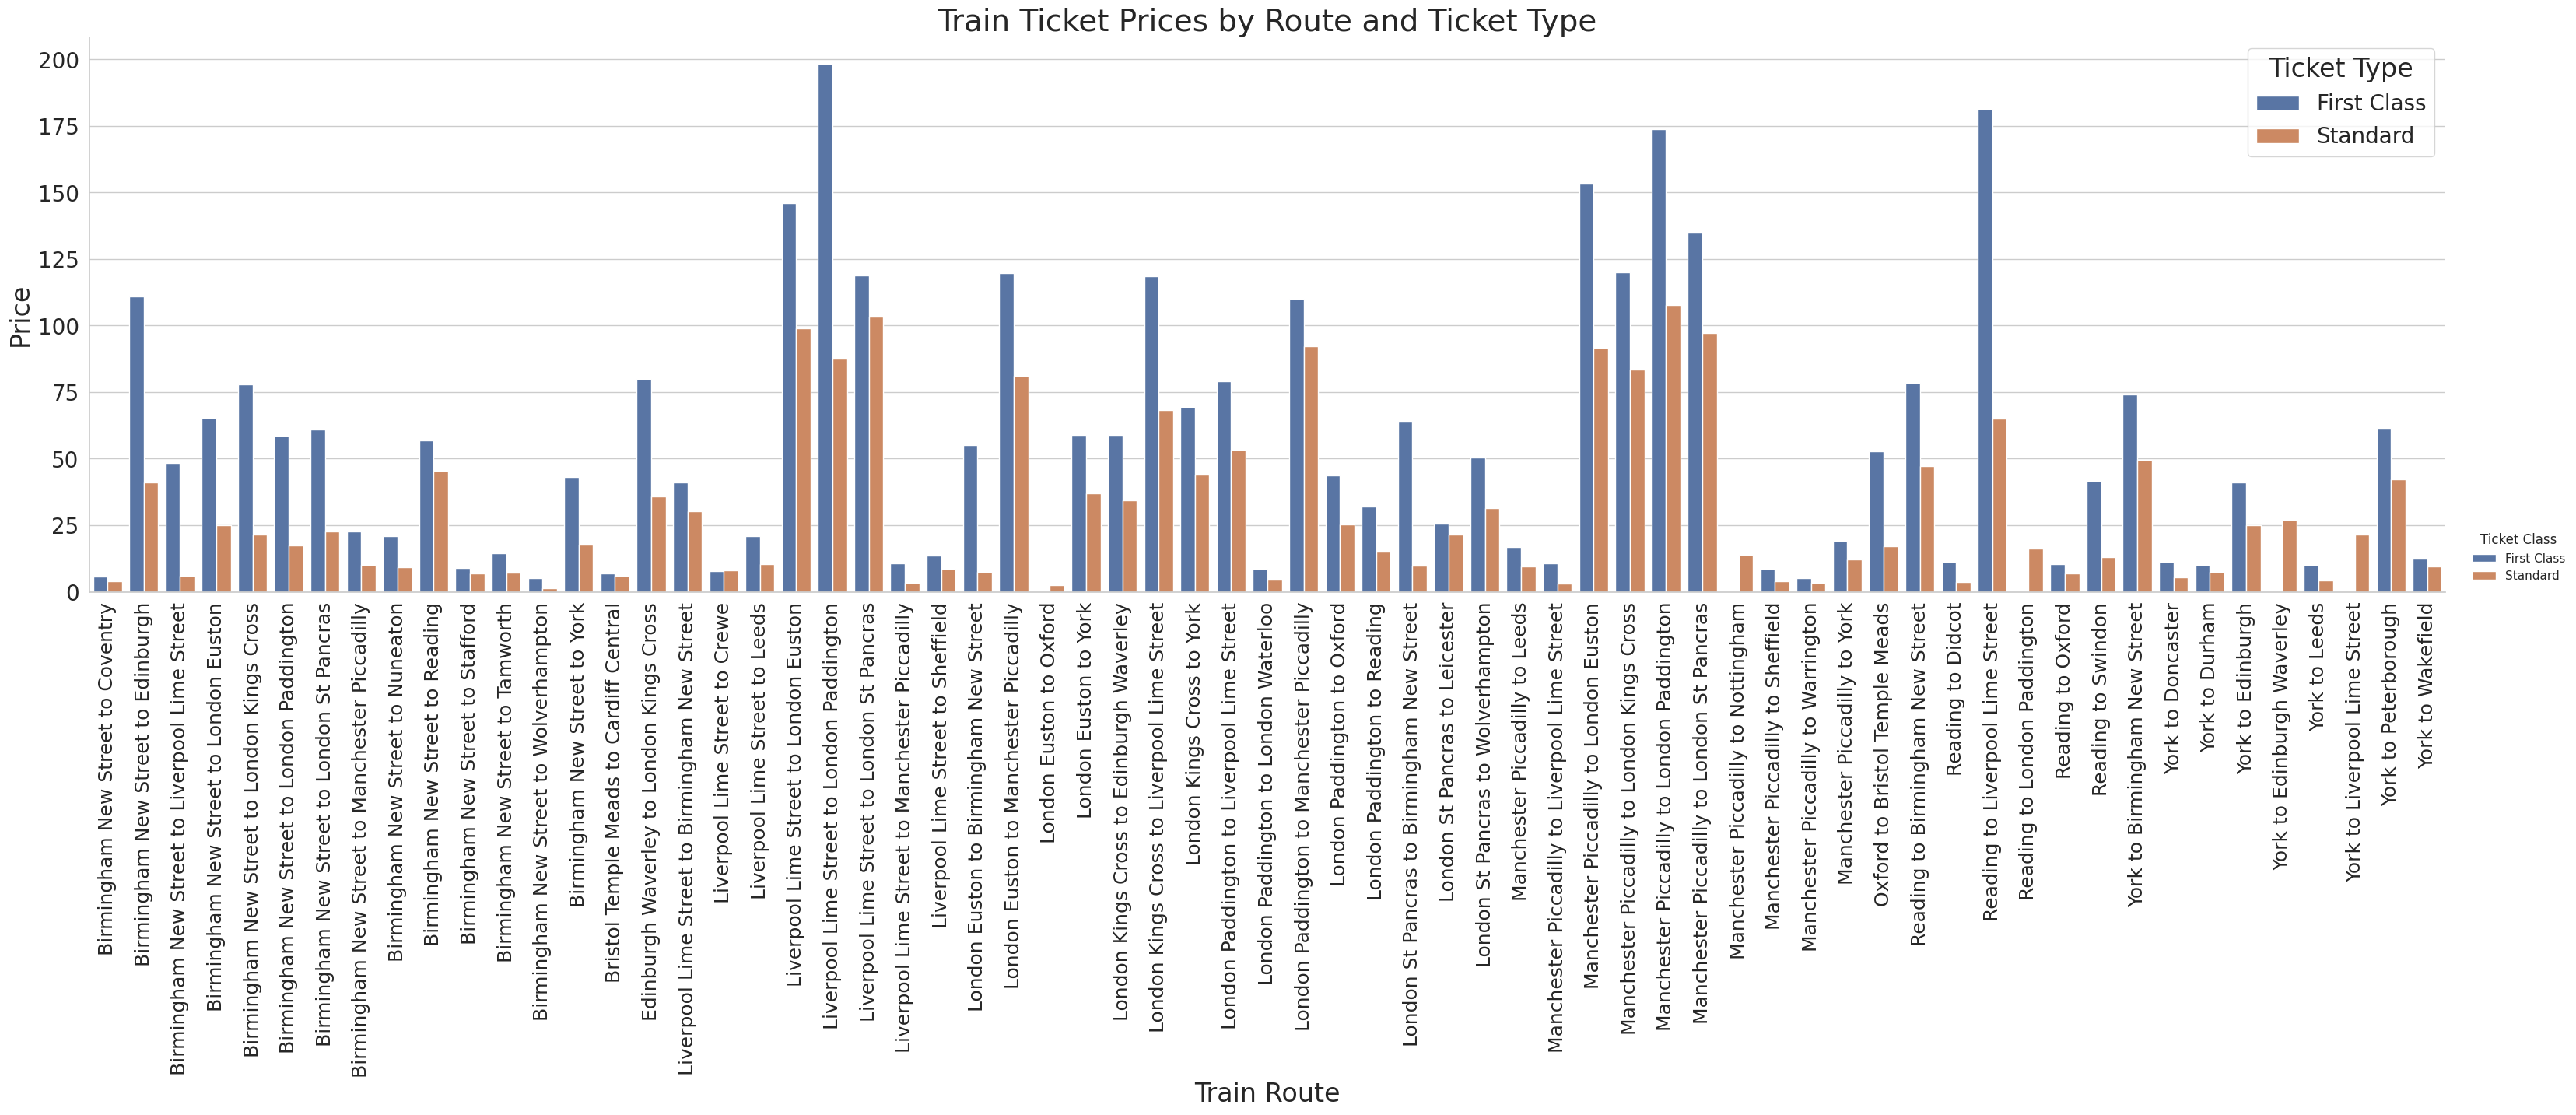

In [34]:
# Creating a catplot (bar plot) for comparing average ticket prices at each route per ticket type
plt.figure(figsize=(12, 6))

plot = sns.catplot(x='Route', y='Price', hue='Ticket Class', data=avg_price_by_route_ticket_class, kind='bar', height=8, aspect=4)

# Customizing labels and title
plt.title('Train Ticket Prices by Route and Ticket Type', fontsize=28)
plt.xlabel('Train Route', fontsize=24)
plt.ylabel('Price', fontsize=24)
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=20)
plt.legend(title='Ticket Type', title_fontsize='24', fontsize='20', loc='upper right')
# Show plot
plt.show()


Routes like "Manchester Piccadilly to London Paddington," "Liverpool Lime Street to London St Pancras," and "Liverpool Lime Street to London Euston" have the highest average ticket prices.
Standard tickets on these routes average above £90, with First Class tickets often exceeding £100.

Routes such as "Liverpool Lime Street to Manchester Piccadilly," "Manchester Piccadilly to Warrington," and "Manchester Piccadilly to Liverpool Lime Street" have the lowest average ticket prices.
Standard tickets on these routes average below £5, with First Class tickets also being relatively inexpensive.
Ticket Class Comparison:

Higher prices on long-distance, high-demand routes reflect premium services and higher operational costs, while lower prices on short-distance routes ensure affordability. This data-driven insight can inform balanced pricing strategies to manage demand, service quality, and revenue effectively.

### How do different routes compare in terms of on-time performance and delay occurrences?

In [35]:
# Grouping by the route and journey status to calculate counts
on_time_perform = ukrailway.groupby(['Route', 'Journey Status']).size().unstack(fill_value=0)

In [36]:
# Calculating the total journeys and the percentage of on-time performance
on_time_perform['Total Journeys'] = on_time_perform.sum(axis=1)
on_time_perform['On Time %'] = (on_time_perform['On Time'] / on_time_perform['Total Journeys']) * 100
ontimeperform = on_time_perform.sort_values(by='On Time %', ascending=False)
# Select top 5 and bottom 5 routes by On Time %
top_5 = ontimeperform.head(5)
bottom_5 = ontimeperform.tail(5)

# Display the results
print("Top 5 Routes by On Time %")
print(top_5)

print("\nBottom 5 Routes by On Time %")
print(bottom_5)

Top 5 Routes by On Time %
Journey Status                              Cancelled  Delayed  On Time  \
Route                                                                     
Reading to Liverpool Lime Street                    0        0       16   
Birmingham New Street to Edinburgh                  0        0       16   
London Euston to Oxford                             0        0       16   
Manchester Piccadilly to York                       0        0       15   
London Paddington to Liverpool Lime Street          0        0       44   

Journey Status                              Total Journeys  On Time %  
Route                                                                  
Reading to Liverpool Lime Street                        16      100.0  
Birmingham New Street to Edinburgh                      16      100.0  
London Euston to Oxford                                 16      100.0  
Manchester Piccadilly to York                           15      100.0  
London Paddingto

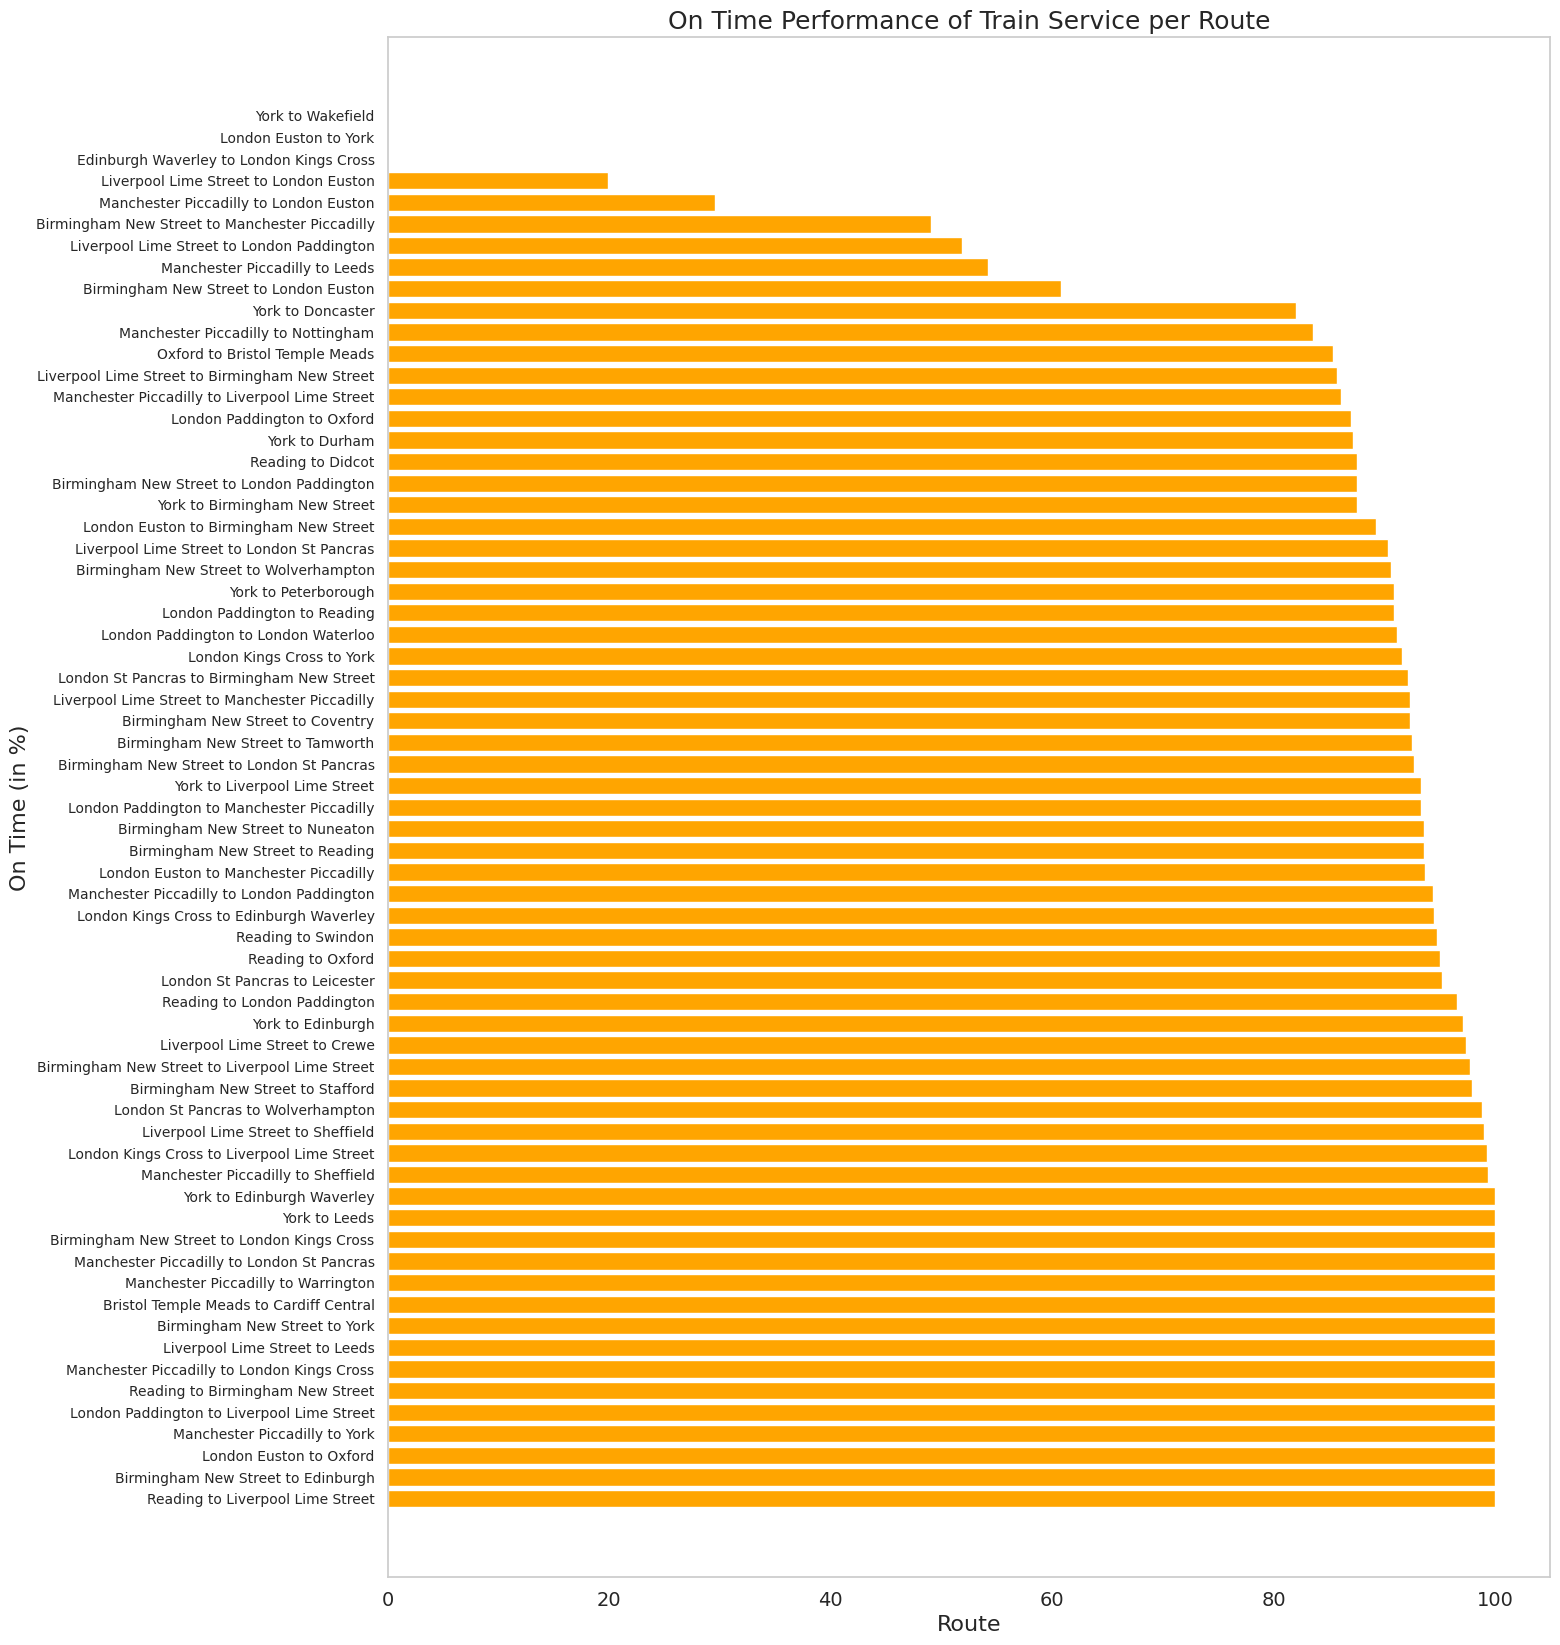

In [37]:
# Plotting the visualization
plt.figure(figsize=(15, 20))
plt.barh(ontimeperform.index, ontimeperform['On Time %'], color='orange')
plt.title('On Time Performance of Train Service per Route', fontsize=18)
plt.xlabel('Route', fontsize=16)
plt.ylabel('On Time (in %)', fontsize=16)
plt.yticks(fontsize=10)
plt.xticks(fontsize=14)
plt.grid(False)
plt.show()

Routes such as "Reading to Liverpool Lime Street," "Birmingham New Street to Edinburgh," "London Euston to Oxford," "Manchester Piccadilly to York," and "London Paddington to Liverpool Lime Street" consistently perform on time.
On the other hand routes like "Manchester Piccadilly to London Euston", "Liverpool Lime Street to London Euston" shows significant delays and cancalletions with very less on time percentage

### How can operational efficiency be improved based on the analysis of train service data?

In [38]:
ukrailway['Reason for Delay'].unique()

array([nan, 'Signal Failure', 'Technical Issue', 'Weather Conditions',
       'Weather', 'Staffing', 'Staff Shortage', 'Signal failure',
       'Traffic'], dtype=object)

In [39]:
value_dict = {'Weather Issue': ['Weather', 'Weather Conditions'],
              'Signal Failure Issue': ['Signal Failure', 'Signal failure'],
              'Staff Shortage Issue':['Staff Shortage'], 'Technical Issue':['Technical Issue'],
              'Staff Issue':['Staffing'], 'Traffic Issue':['Traffic'], 'Unknown Issue':[np.nan]}

reverse_dict = {v: k for k, values in value_dict.items() for v in values}

# Replace values in 'Reason for Delay' column using reverse_dict
ukrailway['Reason for Delay'] = ukrailway['Reason for Delay'].replace(reverse_dict)


In [40]:
# Identifying and sorting routes according to the highest delay occurrences
delay_occur = ukrailway[ukrailway['Journey Status'] == 'Delayed'].groupby(['Route']).size().reset_index(name='Delay Count')
delay_occur = delay_occur.sort_values(by='Delay Count', ascending=False)
print("Top 10 Routes with Highest Delay Occurrences:\n")
delay_occur.head(10)

Top 10 Routes with Highest Delay Occurrences:



,Route,Delay Count
3,Liverpool Lime Street to London Euston,780
11,Manchester Piccadilly to Liverpool Lime Street,354
6,London Euston to Birmingham New Street,242
12,Manchester Piccadilly to London Euston,240
8,London Kings Cross to York,131
5,Liverpool Lime Street to Manchester Piccadilly,107
1,Birmingham New Street to Manchester Piccadilly,96
9,London Paddington to Reading,66
10,Manchester Piccadilly to Leeds,64
2,Edinburgh Waverley to London Kings Cross,51


Liverpool Lime Street to London Euston has the highest delay count (780), wheare as Edinburgh Waverley to London Kings Cross has compatratively low delay count (51)

In [41]:
# Analyzing reasons for delays
delay_reasons = ukrailway[ukrailway['Journey Status'] == 'Delayed']['Reason for Delay'].value_counts().reset_index()
print("Reasons for Delays in descending order:\n")
delay_reasons

Reasons for Delays in descending order:



,Reason for Delay,count
0,Weather Issue,927
1,Technical Issue,472
2,Signal Failure Issue,451
3,Staff Shortage Issue,183
4,Staff Issue,172
5,Traffic Issue,87


The primary reason for delays is weather issues, which are beyond human control. Traffic issues, which have the least delay count, can be managed and improved to reduce delays. Besides these, staff shortages are a significant cause of delays, while technical and signal failure issues can also be addressed to improve punctuality.

In [42]:
# Identifying the occurences of particular delay reasons for each service route 
delay_reasons_by_route = ukrailway[ukrailway['Journey Status'] == 'Delayed'].groupby(['Route', 'Reason for Delay']).size().unstack(fill_value=0)
print("Delay Reasons by Route:\n")
delay_reasons_by_route

Delay Reasons by Route:



Reason for Delay,Signal Failure Issue,Staff Issue,Staff Shortage Issue,Technical Issue,Traffic Issue,Weather Issue
Route,,,,,,
Birmingham New Street to London Euston,0,13,0,0,0,31
Birmingham New Street to Manchester Piccadilly,0,0,0,96,0,0
Edinburgh Waverley to London Kings Cross,0,51,0,0,0,0
Liverpool Lime Street to London Euston,24,45,4,139,40,528
Liverpool Lime Street to London Paddington,0,0,13,0,0,0
Liverpool Lime Street to Manchester Piccadilly,20,0,0,87,0,0
London Euston to Birmingham New Street,124,0,18,0,0,100
London Euston to York,17,0,0,0,0,0
London Kings Cross to York,84,0,0,47,0,0


Weather Issues: Predominantly affect routes like "Liverpool Lime Street to London Euston" (528) and "Manchester Piccadilly to London Euston" (146), highlighting the impact of uncontrollable weather conditions.
Technical and Signal Failures: Routes such as "London Euston to Birmingham New Street" (124) and "Liverpool Lime Street to London Euston" (139) show significant delays due to technical problems, which can be managed with better maintenance.
Staff Issues: "Manchester Piccadilly to Liverpool Lime Street" faces 110 delays due to staff shortages, and "Edinburgh Waverley to London Kings Cross" has 51 staff-related delays, indicating areas where staffing improvements are needed.
Traffic Issues: Least frequent but still present, such as on the "Liverpool Lime Street to London Euston" route (40), and can be improved through better scheduling and traffic management.

We tried to give suggestion for each route which can help for better performance. 

In [43]:
for route in delay_occur['Route']:
    route_delay_reason = delay_reasons_by_route.loc[route].idxmax()
    print(f"Route: {route}")
    if route_delay_reason == 'Weather Issue':
        print("\tSuggestion: Focus on better weather forecasting and take appropriate measures to make the route more resilient towards weather.")
    elif route_delay_reason == 'Technical Issue':
        print("\tSuggestion: Regular maintenance of technical equipments should be increased and a detailed check up of these technical equipments should be done.")
    elif route_delay_reason == 'Signal Failure Issue':
        print("\tSuggestion: Investing in modern signal systems and finding out the dead signal zones so that appropriate receivers can be placed.")
    elif route_delay_reason == 'Staff Shortage Issue':
        print(" \tSuggestion: Ensuring adequate staffing is done so that this delay is mitigated.")
    elif route_delay_reason == 'Staff Issue':
        print(" \tSuggestion: Appropriate training must be provided to the staff on frequent basis, so that the can be adept to handle each and everty situation.")
    elif route_delay_reason == 'Traffic Issue':
        print(" \tSuggestion: Generating a new time table to avoid traffic related issue but keeping in mind that new time table would not cause any issue with the service freequency.")
    print()

Route: Liverpool Lime Street to London Euston
	Suggestion: Focus on better weather forecasting and take appropriate measures to make the route more resilient towards weather.

Route: Manchester Piccadilly to Liverpool Lime Street
 	Suggestion: Ensuring adequate staffing is done so that this delay is mitigated.

Route: London Euston to Birmingham New Street
	Suggestion: Investing in modern signal systems and finding out the dead signal zones so that appropriate receivers can be placed.

Route: Manchester Piccadilly to London Euston
	Suggestion: Focus on better weather forecasting and take appropriate measures to make the route more resilient towards weather.

Route: London Kings Cross to York
	Suggestion: Investing in modern signal systems and finding out the dead signal zones so that appropriate receivers can be placed.

Route: Liverpool Lime Street to Manchester Piccadilly
	Suggestion: Regular maintenance of technical equipments should be increased and a detailed check up of these tec